# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

1. Open the `categoricals` variable we created before.

```python
categoricals = data.select_dtypes(np.object)
categoricals.head()
```

2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Plot time variable. Can you extract something from it?

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/robertkammerer/Ironhack/04_Week/day2_labs/lab-feature-extraction/we_fn_use_c_marketing_customer_value_analysis.csv')
data.columns = [x.replace(' ','_').lower() for x in data.columns]
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [2]:
# Categoricals

data.dtypes

categoricals = data.select_dtypes('object')
categoricals = categoricals.drop(['customer'],axis=1)
categoricals.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [3]:
# Cleaning from last Lab

# verhicle class -> combine Sports Car, Luxury Car and Luxury SUV

def clean_class(x):
    if x in ['Sports Car', 'Luxury Car', 'Luxury SUV']:
        return 'Luxury'
    else:
        return x
    
categoricals['vehicle_class'] = categoricals['vehicle_class'].apply(clean_class)

# employement status -> employed, unemployed, other

def clean_employment(x):
    if x in ['Medical Leave', 'Disabled', 'Retired']:
        return 'Other'
    else:
        return x
    
categoricals['employmentstatus'] = categoricals['employmentstatus'].apply(clean_employment)

# education -> Master + Doctor -> higher education

def clean_education(x):
    if x in ['Master', 'Doctor']:
        return 'Higher Education'
    else:
        return x
    
categoricals['education'] = categoricals['education'].apply(clean_education)

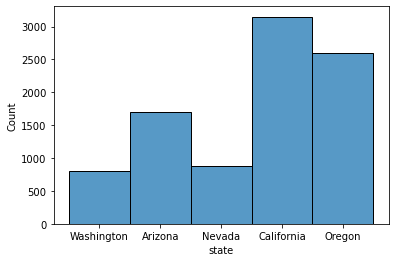

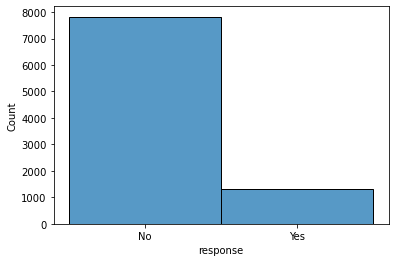

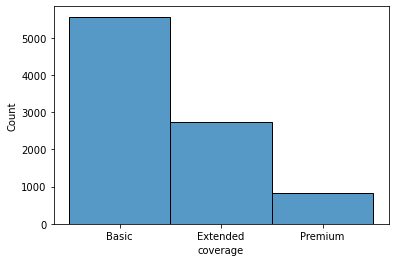

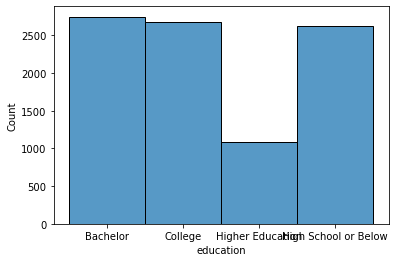

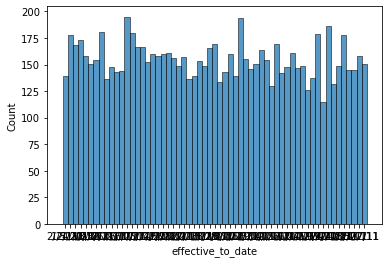

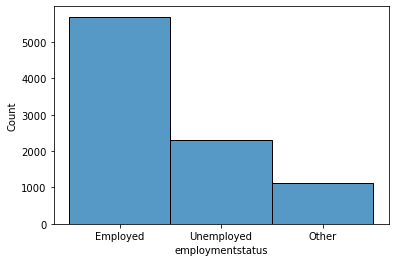

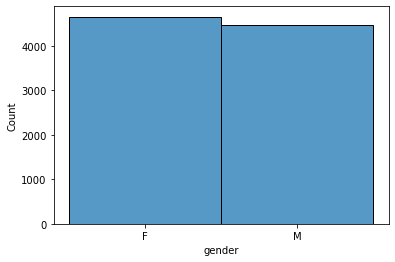

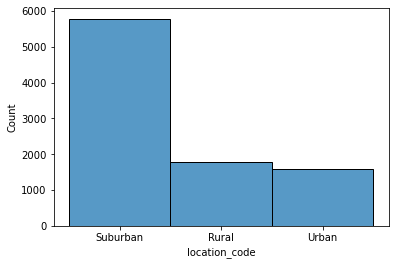

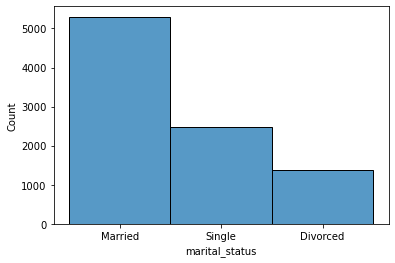

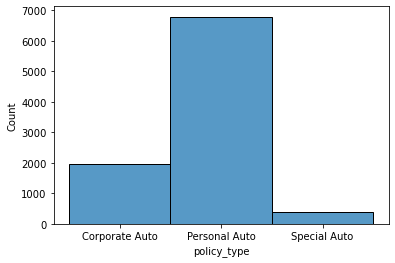

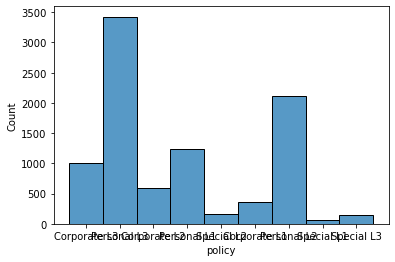

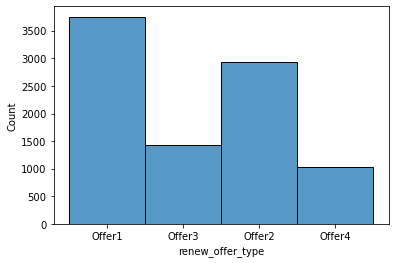

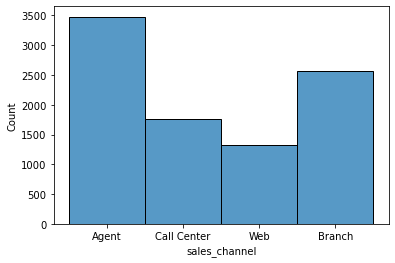

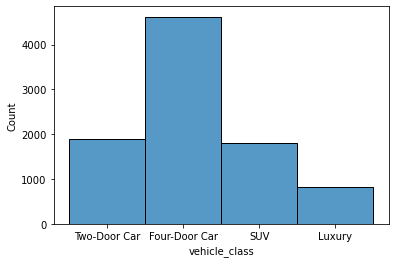

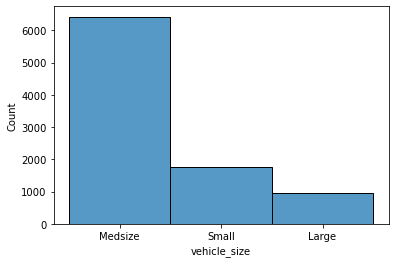

In [4]:
# Plot all the categorical variables with the proper plot. What can you see?

def plot_categoricals(df_cat):
    for col in df_cat.columns:
        plt.figure()
        sns.histplot(x=df_cat[col]) 
        
plot_categoricals(categoricals)

In [5]:
#There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

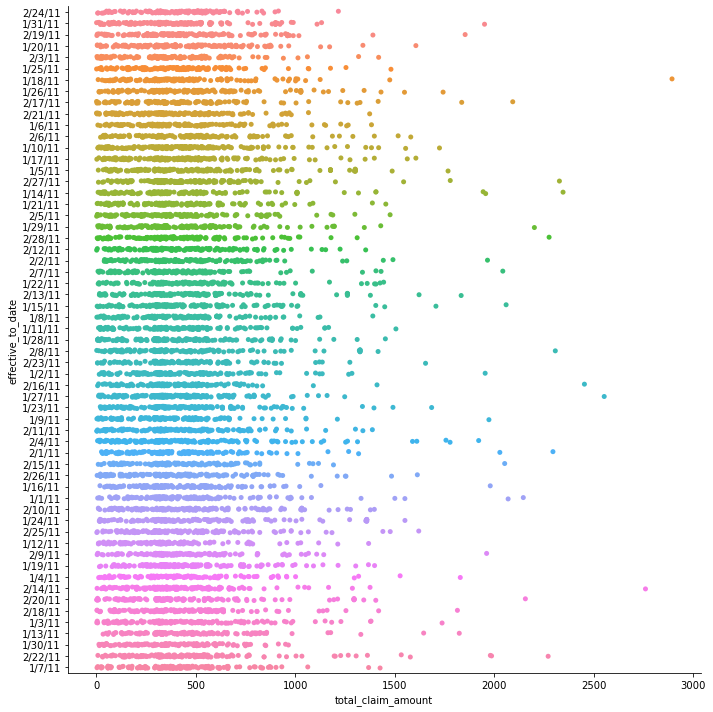

In [6]:
#Plot time variable. Can you extract something from it?

sns.catplot(x='total_claim_amount',y='effective_to_date', data=data, height=10)

In [7]:
data['effective_to_date']

0       2/24/11
1       1/31/11
2       2/19/11
3       1/20/11
4        2/3/11
         ...   
9129    2/10/11
9130    2/12/11
9131     2/6/11
9132     2/3/11
9133    2/14/11
Name: effective_to_date, Length: 9134, dtype: object

# Lab | Comparing regression models


For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

1. In this final lab, we will model our data. Import sklearn `train_test_split` and separate the data.

2. We will start with removing outliers, if you have not already done so.  We have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

3. Create a copy of the dataframe for the data wrangling.

4. Normalize the continuous variables. You can use any one method you want.

5. Encode the categorical variables (See the hint below for encoding categorical data!!!)

6. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

7. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.


## Hint for Categorical Variables

You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):
Encoder Type | Column 
-----------------|-----------------
One hot | state
Ordinal | coverage
Ordinal | employmentstatus
Ordinal | location code
One hot | marital status
One hot | policy type
One hot | policy
One hot | renew offercustomer_df
One hot | sales channel
One hot | vehicle class
Ordinal | vehicle size

##### Dummy code
data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

given that column "coverage" in the dataframe "data" has three categories:

"basic", "extended", and "premium" and values are to be represented in the same order.



8. Try a simple linear regression with all the data to see whether we are getting good results.

9. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

10. Use the function to check `LinearRegressor` and `KNeighborsRegressor`.

12. Check and discuss the results.

In [8]:
# Merge data from previous labs to a new data2

numericals = data.select_dtypes('number')

data2 = pd.concat([categoricals,numericals],axis=1)

data2.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,...,vehicle_class,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,...,Two-Door Car,Medsize,2763.519279,56274,69,32,5,0,1,384.811147
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,...,Four-Door Car,Medsize,6979.535903,0,94,13,42,0,8,1131.464935
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,...,Two-Door Car,Medsize,12887.431650,48767,108,18,38,0,2,566.472247
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,...,SUV,Medsize,7645.861827,0,106,18,65,0,7,529.881344
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,...,Four-Door Car,Medsize,2813.692575,43836,73,12,44,0,1,138.130879


In [9]:
# X-y split

X=data2.drop(['total_claim_amount'], axis=1)
y=data2['total_claim_amount']

X.columns

Index(['state', 'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies'],
      dtype='object')

In [10]:
# 1. Train_Test_Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6393, 22)
(2741, 22)
(6393,)
(2741,)


In [11]:
# We will start with removing outliers, if you have not already done so. 
# We have discussed different methods to remove outliers. Use the one you feel more comfortable with, 
# define a function for that. Use the function to remove the outliers and apply it to the dataframe.

# Numerical variables from the lab before -> huge number of outliers 
# -> means that they are a relevant part of long tailed dataset


In [12]:
# Normalize the numericals

X_train_num = X_train.select_dtypes('number')
X_test_num = X_test.select_dtypes('number')

from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
standardizer.fit(X_train_num) # fit () Determine the min and the max of each column 

x_train_stand = standardizer.transform(X_train_num) # .transform() applies the transformation x normalized will be np.array
x_train_stand = pd.DataFrame(x_train_stand, columns=X_train_num.columns)
display(x_train_stand.head())

x_test_stand = standardizer.transform(X_test_num) # .transform() applies the transformation x normalized will be np.array
x_test_stand = pd.DataFrame(x_test_stand, columns=X_test_num.columns)
display(x_test_stand.head())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.502395,-0.823844,-0.699111,1.595053,-1.187130,3.975583,0.011794
1,1.100452,-0.468812,-0.325296,-1.202772,-0.718110,-0.421252,-0.404781
2,-0.431409,0.772547,-0.785376,-0.803083,-0.249090,1.777166,2.511245
3,-0.419716,1.146589,0.939923,1.894820,0.003459,-0.421252,-0.821356
4,1.094831,-1.239827,2.492691,1.395208,-1.042816,2.876374,-0.404781


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.422208,0.624518,-0.814130,-1.102850,1.446598,0.677957,1.261519
1,-0.455901,-0.540174,0.853658,-1.202772,-1.295365,-0.421252,-0.821356
2,-0.367143,-0.123566,-0.727866,-0.403394,1.266206,-0.421252,2.511245
3,-0.628825,-0.661385,0.077274,-0.903005,-1.547915,-0.421252,-0.821356
4,0.099718,0.497015,0.451088,-1.002928,0.436401,-0.421252,2.094670


In [13]:
# Encode the categorical variables (See the hint below for encoding categorical data!!!)

X_train_cat = X_train.select_dtypes('object')
X_test_cat = X_test.select_dtypes('object')

X_train_cat.head()

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
8720,California,No,Basic,Higher Education,1/6/11,Other,F,Suburban,Single,Personal Auto,Personal L2,Offer4,Branch,Four-Door Car,Small
6092,Oregon,No,Extended,High School or Below,1/20/11,Other,M,Suburban,Divorced,Personal Auto,Personal L3,Offer3,Agent,Two-Door Car,Medsize
1412,Oregon,No,Basic,High School or Below,1/1/11,Employed,F,Urban,Single,Personal Auto,Personal L3,Offer1,Call Center,Four-Door Car,Medsize
4717,California,No,Extended,Higher Education,2/23/11,Employed,M,Urban,Married,Personal Auto,Personal L3,Offer2,Agent,SUV,Large
3725,Arizona,No,Premium,Bachelor,1/5/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Agent,SUV,Medsize


In [14]:
# Ordinals

X_train_cat_ord=X_train_cat[["coverage","employmentstatus","location_code","vehicle_size"]]

X_train_cat_ord["coverage"] = X_train_cat_ord["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
X_train_cat_ord["employmentstatus"] = X_train_cat_ord["employmentstatus"].map({"Other" : 0, "Unemployed" : 1, "Employed" : 2})
X_train_cat_ord["location_code"] = X_train_cat_ord["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
X_train_cat_ord["vehicle_size"] = X_train_cat_ord["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})

display(X_train_cat_ord.head())


X_test_cat_ord=X_test_cat[["coverage","employmentstatus","location_code","vehicle_size"]]

X_test_cat_ord["coverage"] = X_test_cat_ord["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
X_test_cat_ord["employmentstatus"] = X_test_cat_ord["employmentstatus"].map({"Other" : 0, "Unemployed" : 1, "Employed" : 2})
X_test_cat_ord["location_code"] = X_test_cat_ord["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
X_test_cat_ord["vehicle_size"] = X_test_cat_ord["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})

display(X_test_cat_ord.head())

/var/folders/gg/ydzntksx7jl3t92y3_bqsw140000gn/T/ipykernel_18141/1601510094.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_ord["coverage"] = X_train_cat_ord["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
/var/folders/gg/ydzntksx7jl3t92y3_bqsw140000gn/T/ipykernel_18141/1601510094.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_ord["employmentstatus"] = X_train_cat_ord["employmentstatus"].map({"Other" : 0, "Unemployed" : 1, "Employed" : 2})
/var/folders/gg/ydznt

,coverage,employmentstatus,location_code,vehicle_size
8720,0,0,1,0
6092,1,0,1,1
1412,0,2,2,1
4717,1,2,2,2
3725,2,1,1,1


/var/folders/gg/ydzntksx7jl3t92y3_bqsw140000gn/T/ipykernel_18141/1601510094.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_ord["coverage"] = X_test_cat_ord["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
/var/folders/gg/ydzntksx7jl3t92y3_bqsw140000gn/T/ipykernel_18141/1601510094.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_ord["employmentstatus"] = X_test_cat_ord["employmentstatus"].map({"Other" : 0, "Unemployed" : 1, "Employed" : 2})
/var/folders/gg/ydzntks

,coverage,employmentstatus,location_code,vehicle_size
7175,0,2,1,1
7255,1,2,0,1
2846,0,2,0,2
1211,1,0,1,1
4294,2,2,0,1


In [17]:
# OHE

from  sklearn.preprocessing import OneHotEncoder

# data
X_train_cat_ohe=X_train_cat.drop(["coverage","employmentstatus","location_code","vehicle_size"],axis=1)
X_test_cat_ohe=X_test_cat.drop(["coverage","employmentstatus","location_code","vehicle_size"],axis=1)

# enconder
encoder = OneHotEncoder(drop='first')
encoder.fit(X_train_cat_ohe)

# train
X_train_cat_encoded = encoder.transform(X_train_cat_ohe).toarray()
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded, columns = encoder.get_feature_names_out())

# test
X_test_cat_encoded  = encoder.transform(X_test_cat_ohe).toarray()
X_test_cat_encoded  = pd.DataFrame(X_test_cat_encoded, columns = encoder.get_feature_names_out())

display(X_train_cat_encoded)
display(X_test_cat_encoded)

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,education_College,education_High School or Below,education_Higher Education,effective_to_date_1/10/11,effective_to_date_1/11/11,...,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6388,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6389,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6390,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6391,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,education_College,education_High School or Below,education_Higher Education,effective_to_date_1/10/11,effective_to_date_1/11/11,...,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2736,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2737,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2738,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2739,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# Handling the Date Variable

X_train_date=X_train[['effective_to_date']]
X_train_date[['day','month', 'year']]= X_train_date['effective_to_date'].str.split('/', expand=True).astype(int)
X_train_date=X_train_date.drop(['year', 'effective_to_date'],axis=1)

X_test_date =X_test[['effective_to_date']]
X_test_date[['day','month', 'year']]= X_test_date['effective_to_date'].str.split('/', expand=True).astype(int)
X_test_date = X_test_date.drop(['year', 'effective_to_date'],axis=1)


display(X_train_date.head())
display(X_test_date.head())

/Users/robertkammerer/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,day,month
8720,1,6
6092,1,20
1412,1,1
4717,2,23
3725,1,5


,day,month
7175,1,14
7255,2,10
2846,2,17
1211,2,17
4294,1,4


In [19]:
# Combine encoded 

x_train_stand.reset_index(drop=True, inplace=True)
X_train_cat_ord.reset_index(drop=True, inplace=True)
X_train_cat_encoded.reset_index(drop=True, inplace=True)
X_train_date.reset_index(drop=True, inplace=True)
x_test_stand.reset_index(drop=True, inplace=True)
X_test_cat_ord.reset_index(drop=True, inplace=True)
X_test_cat_encoded.reset_index(drop=True, inplace=True)
X_test_date.reset_index(drop=True, inplace=True)

X_train_final = pd.concat([x_train_stand, X_train_cat_ord, X_train_cat_encoded,X_train_date], axis=1 )
X_test_final  = pd.concat([x_test_stand, X_test_cat_ord, X_test_cat_encoded,X_test_date], axis=1 )

display(X_train_final.head())
display(X_test_final.head())
X_train_final.shape
X_test_final.shape

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,employmentstatus,location_code,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,day,month
0,-0.502395,-0.823844,-0.699111,1.595053,-1.187130,3.975583,0.011794,0,0,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,6
1,1.100452,-0.468812,-0.325296,-1.202772,-0.718110,-0.421252,-0.404781,1,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,20
2,-0.431409,0.772547,-0.785376,-0.803083,-0.249090,1.777166,2.511245,0,2,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1
3,-0.419716,1.146589,0.939923,1.894820,0.003459,-0.421252,-0.821356,1,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,23
4,1.094831,-1.239827,2.492691,1.395208,-1.042816,2.876374,-0.404781,2,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,coverage,employmentstatus,location_code,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,day,month
0,-0.422208,0.624518,-0.814130,-1.102850,1.446598,0.677957,1.261519,0,2,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,14
1,-0.455901,-0.540174,0.853658,-1.202772,-1.295365,-0.421252,-0.821356,1,2,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2,10
2,-0.367143,-0.123566,-0.727866,-0.403394,1.266206,-0.421252,2.511245,0,2,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,17
3,-0.628825,-0.661385,0.077274,-0.903005,-1.547915,-0.421252,-0.821356,1,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2,17
4,0.099718,0.497015,0.451088,-1.002928,0.436401,-0.421252,2.094670,2,2,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,4


(2741, 101)

In [20]:
# Try a simple linear regression with all the data to see whether we are getting good results.

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train_final, y_train)

LinearRegression()

In [26]:
from sklearn.metrics import r2_score

y_pred_train = lm.predict(X_train_final)
print("r2 for train data: ",r2_score(y_train, y_pred_train))

y_pred_test = lm.predict(X_test_final)
print("r2 for test data: ",r2_score(y_test, y_pred_test))

print("r2 for linear model is: ",lm.score(X_test_final, y_test))

r2 for train data:  0.6281116170491354
r2 for test data:  0.6179878185783967
r2 for linear model is:  0.6179878185783967


In [68]:
# Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them 
# without repeating code.

def best_model(x_tr, x_test, y_tr, y_test):
    from sklearn.linear_model import LinearRegression
    lm = LinearRegression()
    lm.fit(x_tr, y_tr)
    lm_pred = lm.predict(x_test)
    print("r2 for linear model is: ",round(lm.score(x_test, y_test),2))
    
    from sklearn.neighbors import KNeighborsRegressor

    knn_models = [] 
    scores = []
    m_type = {}
    for p in range(1,15):
        for k in range(2,4):
            knn = KNeighborsRegressor(n_neighbors=k, p = p)
            knn.fit(x_tr, y_tr)
            knn_models.append(knn)
            scores.append(round(knn.score(x_test, y_test),2))
            m_type["p: "+str(p)+" k: "+str(k)]= knn.score(x_test, y_test)
    print('The best KNN model with: ', max(m_type, key=m_type.get), 'has a score of: ', m_type[max(m_type, key=m_type.get)])
    


In [66]:
knn_df = best_model(X_train_final, X_test_final, y_train, y_test)


r2 for linear model is:  0.62
The best KNN model with:  p: 1 k: 3 has a score of:  0.4961494404232657


In [67]:
# Use the function to check LinearRegressor and KNeighborsRegressor.
# Check and discuss the results.

# The linear regression performs better than the KNN model
